# Assignmnet 1 (100 points)

**Name:** Dev Bhanushali<br>
**Email:** deb3962@thi.de<br>
**Group:** A <br>
**Hours spend *(optional)* : 4 hours 30 min** <br>

### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve. The usage of other python modules is not permitted.</p>

imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re
import math

data cleaning and simple tokenization

In [2]:
data = None
with open("./Datasets and resources/jungle_book.txt", "r") as handle:
    data = handle.read()

# replace all characters with spaces except spaces and alphabets
data = re.sub(r'[^a-zA-Z\s]', '', data)
while("\n" in data): data = data.replace("\n", " ")
data = data.split()

# small check to make sure all words contain only alphabets
outliers = 0
for i in data:
    if(not(i.isalpha())):
        outliers += 1
        print(i)

print("All words contain only alphabets") if outliers == 0 else print(f"{outliers} words are cleaned incorrectly")

All words contain only alphabets


extracting word frequencies and rank data

In [3]:
# find frequencies and ranks of words
freq = {}

for i in data:
    if(i in freq.keys()):
        freq[i] = freq[i] + 1
    else:
        freq[i] = 1


values = list(freq.values())
values.sort(reverse=True)
ranks = np.array(range(len(values)))

# logbase10 transformation to both word-rank and frequencies
log_values = np.log10(values)
log_ranks = np.log10(ranks)

# train x and y for regression curve fitting
x = log_ranks.reshape(-1, 1)
y = log_values

# filter out data that can not be represented in float64 form
finite_indices = np.where(np.isfinite(x) & np.isfinite(y))[0]
x, y = x[finite_indices], y[finite_indices]

# fit a regression line and check for negative slope and resemblance with the plotted log-frequency vs log-rank relation to verify zipfs law
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

C:\Users\devbh\AppData\Local\Temp\ipykernel_9100\6361383.py:17: RuntimeWarning: divide by zero encountered in log10
  log_ranks = np.log10(ranks)


log-log plot of word rank vs frequency plot

Slope of fitted regression line: -1.1064664118770193


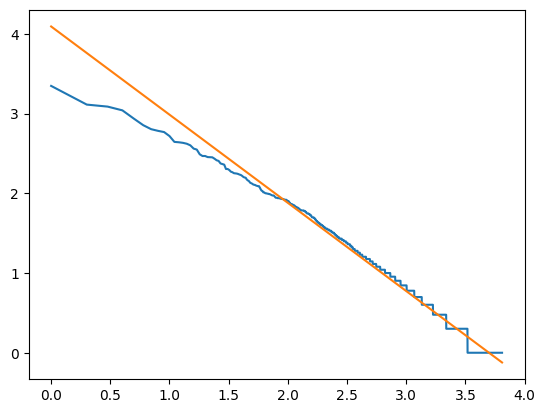

In [4]:
plt.plot(log_ranks, log_values)
plt.plot(x, y_pred)

print(f"Slope of fitted regression line: {model.coef_[0]}")

This plot depicts a roughly linear relation between log-frequency and log-rank with a negative slope. With this we have confirmed zipfs law.

### Question 2: Mutual Information *(30 points)*

Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative.

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. If needed, you can use nltk library. </p>

In [28]:
data = None
with open("./Datasets and resources/jungle_book.txt", "r") as handle:
    data = handle.read()

# replace all characters with spaces except spaces, alphabets, commas and fullstops
data = re.sub(r'[^a-zA-Z\s,.]', '', data)
while("\n" in data): data = data.replace("\n", " ")
data = data.replace(",", ".")
data = data.lower()
data = data.split(".")

count tokens and store bigram pairs

In [29]:
import nltk
token_freq = {}
bigram_pairs = []
for i in data:
    tokens = nltk.word_tokenize(i)

    # count tokens
    for i in tokens:
        if(i not in token_freq.keys()):
            token_freq[i] = 1
        else:
            token_freq[i] = token_freq[i] + 1

    # store bigram token pairs
    bigram_pairs.extend([pair for pair in nltk.bigrams(tokens)])

# pairs_merged = np.array(pairs_merged)

print(f"Number of tokens: {len(token_freq.keys())}")
print(f"Number of bigram pairs: {len(bigram_pairs)}")

Number of tokens: 5559
Number of bigram pairs: 48254


remove tokens with freq less than 10

In [30]:
tokens = list(token_freq.keys())
for i in tokens:
    if(token_freq[i] < 10):
        del token_freq[i]

print(f"Number of tokens after cleaning: {len(token_freq.keys())}")
tokens = list(token_freq.keys())

cleaned_bigram_pairs = []
for i in bigram_pairs:
    if(i[0] in tokens and i[1] in tokens):
        cleaned_bigram_pairs.append(i)

print(f"Number of bigram pairs after cleaning: {len(cleaned_bigram_pairs)}")
print(f"Number of unique bigram pairs after cleaning: {len(set(cleaned_bigram_pairs))}")

Number of tokens after cleaning: 700
Number of bigram pairs after cleaning: 31663
Number of unique bigram pairs after cleaning: 11690


In [36]:
N = len(token_freq.keys()) # number of indivisual tokens
unique_pairs = list(set(cleaned_bigram_pairs))

pwi_info = {}

for i in unique_pairs:
    c_w1_w2 = cleaned_bigram_pairs.count(i)
    c_w1 = token_freq[i[0]]
    c_w2 = token_freq[i[1]]

    pwi_info[i] = math.log((c_w1_w2 * N) / (c_w1 * c_w2))


In [33]:
sorted_pwi_info = []
for i in pwi_info.keys():
    sorted_pwi_info.append([i, pwi_info[i]])

sorted_pwi_info = sorted(sorted_pwi_info, key=lambda x: x[1])

In [34]:
print("30 Word Pairs with lowest PWI")
print([x[0] for x in sorted_pwi_info[:30]])

30 Word Pairs with lowest PWI
[('and', 'and'), ('of', 'and'), ('i', 'the'), ('of', 'of'), ('that', 'and'), ('of', 'he'), ('to', 'he'), ('for', 'and'), ('and', 'is'), ('is', 'and'), ('had', 'the'), ('and', 'of'), ('but', 'and'), ('not', 'and'), ('to', 'i'), ('one', 'the'), ('were', 'the'), ('of', 'for'), ('he', 'and'), ('this', 'the'), ('is', 'of'), ('would', 'the'), ('of', 'said'), ('for', 'to'), ('to', 'as'), ('them', 'the'), ('they', 'of'), ('him', 'of'), ('that', 'in'), ('do', 'the')]


In [35]:
print("30 Word Pairs with highest PWI")
print([x[0] for x in sorted_pwi_info[-30:]])

30 Word Pairs with highest PWI
[('front', 'flippers'), ('brown', 'baby'), ('copyright', 'laws'), ('villagers', 'lived'), ('within', 'days'), ('brown', 'bear'), ('wolfs', 'cave'), ('mothers', 'heart'), ('moon', 'rose'), ('black', 'panther'), ('council', 'rock'), ('mans', 'cub'), ('bring', 'news'), ('years', 'ago'), ('master', 'words'), ('hind', 'flippers'), ('electronic', 'works'), ('whole', 'line'), ('twenty', 'yoke'), ('fore', 'paws'), ('hind', 'legs'), ('petersen', 'sahib'), ('gutenberg', 'literary'), ('stretched', 'myself'), ('cold', 'lairs'), ('archive', 'foundation'), ('darzees', 'wife'), ('united', 'states'), ('literary', 'archive'), ('machua', 'appa')]


### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements. Finally, compare the performance of the language model with and without Backoff.</p>

<p> You cannot use any Python libraries like NLTK. If you need to use special Python modules, you can discuss with your instructor before submission. </p>

<h4> Datasets and Resources </h4> 

* WikiText-2 (raw/unprocessed), Train, Dev, Test

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*